<a href="https://colab.research.google.com/github/SnehaPandey-1720/Ds-Da-learning-hub/blob/main/LGBM%26XGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Exploratory Data Analysis (EDA):

Load the Titanic dataset using Python's pandas library.

In [ ]:
titanic_data = pd.read_csv("/content/Titanic_train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("# Passengers in Orginal Data:" + str(len(titanic_data.index))) # Total Passegers

# Passengers in Orginal Data:891


Check for missing values.

In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_data = titanic_data.dropna()

In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Explore data distributions using histograms and box plots.

<Axes: ylabel='Frequency'>

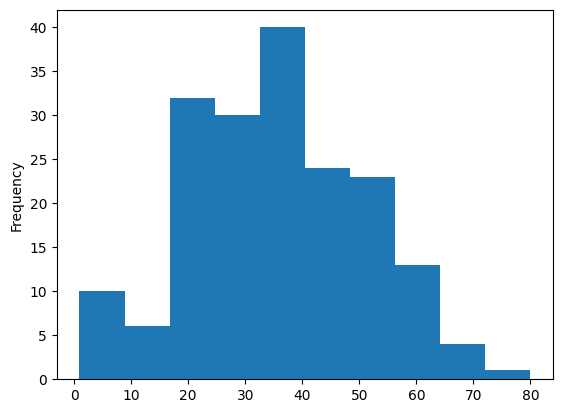

In [ ]:
titanic_data['Age'].plot.hist()

<Axes: ylabel='Frequency'>

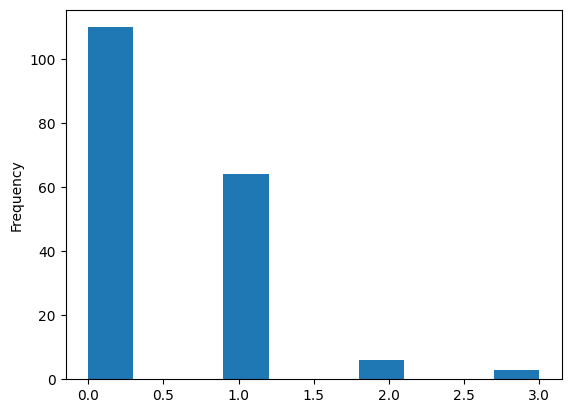

In [ ]:
titanic_data['SibSp'].plot.hist()

<Axes: ylabel='Frequency'>

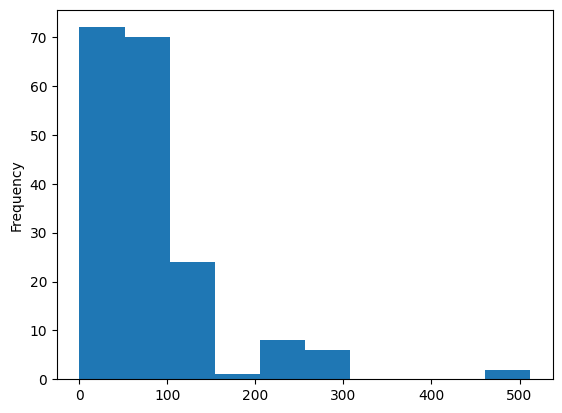

In [ ]:
titanic_data['Fare'].plot.hist()

<Axes: xlabel='Pclass', ylabel='Age'>

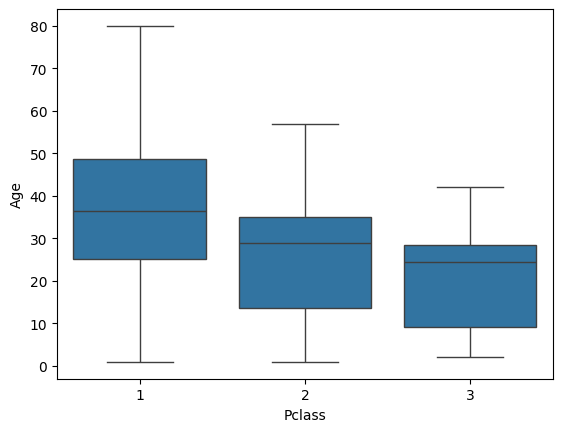

In [ ]:
sns.boxplot(x = "Pclass", y = "Age", data = titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

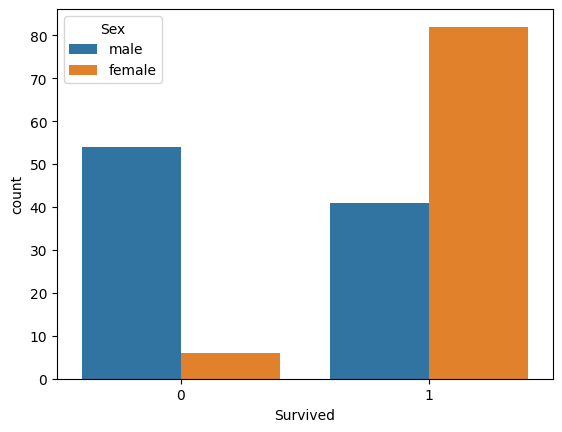

In [ ]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_data)

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Visualize relationships between features and survival using scatter plots and bar plots.

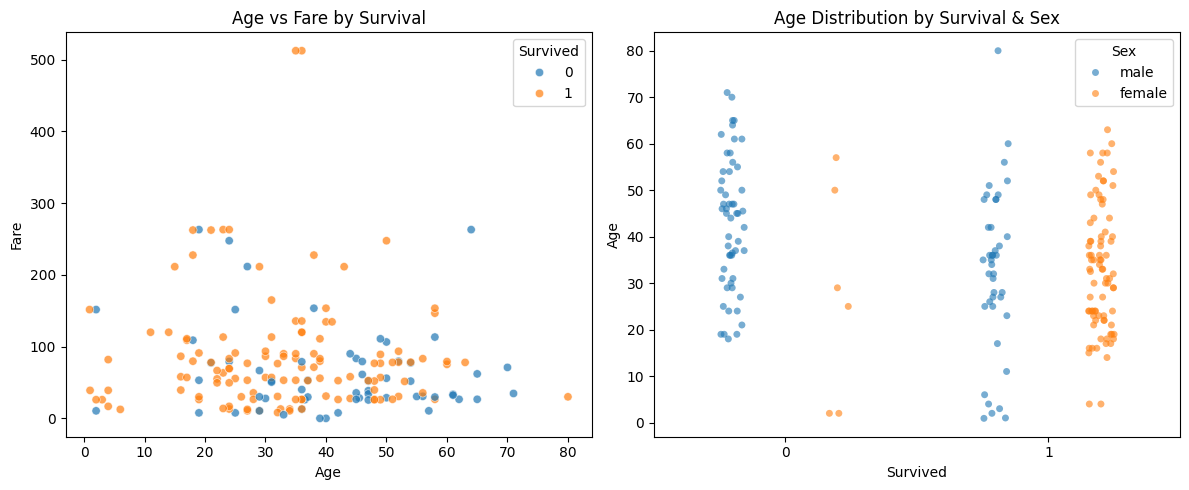

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age vs Fare, colored by survival
sns.scatterplot(data=titanic_data, x="Age", y="Fare", hue="Survived", alpha=0.7, ax=axes[0])
axes[0].set_title("Age vs Fare by Survival")

# Age distribution across survival, separated by sex
sns.stripplot(data=titanic_data, x="Survived", y="Age", hue="Sex", dodge=True, alpha=0.6, ax=axes[1])
axes[1].set_title("Age Distribution by Survival & Sex")

plt.tight_layout()
plt.show()

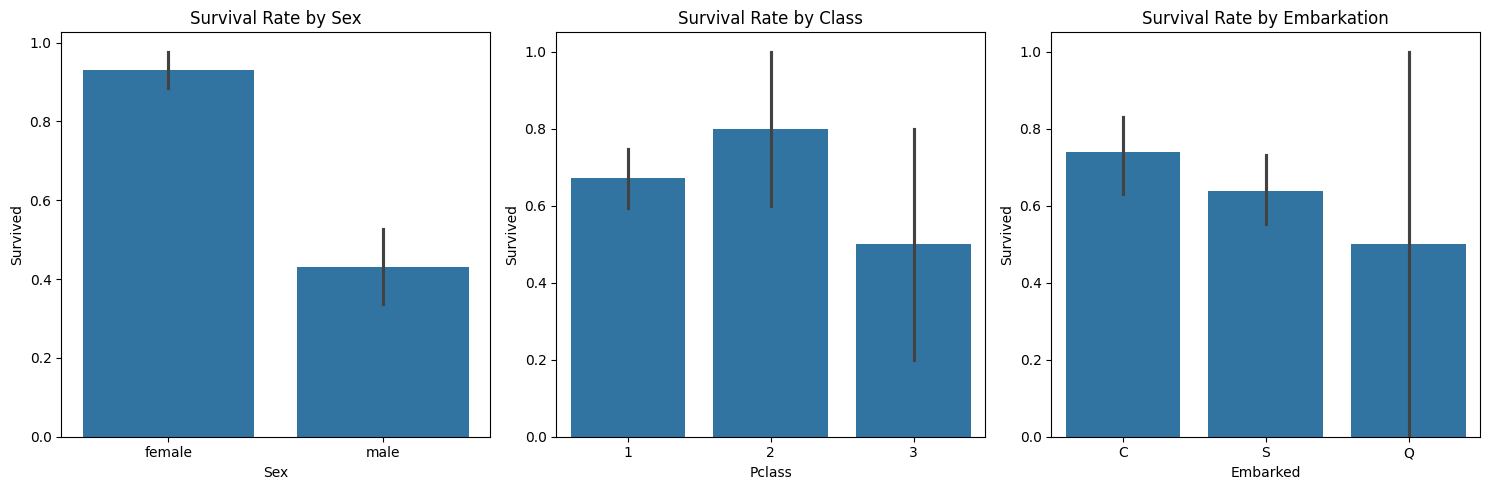

In [ ]:
# Bar plots (categorical features vs survival)
# -------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=titanic_data, x="Sex", y="Survived", ax=axes[0])
axes[0].set_title("Survival Rate by Sex")

sns.barplot(data=titanic_data, x="Pclass", y="Survived", ax=axes[1])
axes[1].set_title("Survival Rate by Class")

sns.barplot(data=titanic_data, x="Embarked", y="Survived", ax=axes[2])
axes[2].set_title("Survival Rate by Embarkation")

plt.tight_layout()
plt.show()

Data Preprocessing:

Impute missing values.

In [ ]:
print("Missing values before imputation:")
print(titanic_data.isnull().sum())

Missing values before imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
imputer_age = SimpleImputer(strategy="median")
titanic_data["Age"] = imputer_age.fit_transform(titanic_data[["Age"]]).ravel()

imputer_embarked = SimpleImputer(strategy="most_frequent")
titanic_data["Embarked"] = imputer_embarked.fit_transform(titanic_data[["Embarked"]]).ravel()

# Cabin → drop or fill with "Unknown" (too many missing values)
# Note: Given previous dropna(), there are no missing values to fill for Cabin in the current DataFrame.
titanic_data["Cabin"] = titanic_data["Cabin"].fillna("Unknown")

print("\nMissing values after imputation:")
print(titanic_data.isnull().sum())


Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
titanic_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


Encode categorical variables using one-hot encoding or label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic_data['Name'] = le.fit_transform(titanic_data['Name'])
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data['Ticket'] = le.fit_transform(titanic_data['Ticket'])
titanic_data['Cabin'] = le.fit_transform(titanic_data['Cabin'])
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,49,0,38.0,1,0,109,71.2833,72,0
3,4,1,1,70,0,35.0,1,0,31,53.1000,48,2
6,7,0,1,112,1,54.0,0,0,55,51.8625,117,2
10,11,1,3,148,0,4.0,1,1,120,16.7000,131,2
11,12,1,1,27,0,58.0,0,0,26,26.5500,43,2


Building Predictive Models:

Split the preprocessed dataset into training and testing sets.

In [ ]:
x = titanic_data.drop('Survived',axis=1)
y = titanic_data['Survived']

In [ ]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,49,0,38.0,1,0,109,71.2833,72,0
3,4,1,70,0,35.0,1,0,31,53.1000,48,2
6,7,1,112,1,54.0,0,0,55,51.8625,117,2
10,11,3,148,0,4.0,1,1,120,16.7000,131,2
11,12,1,27,0,58.0,0,0,26,26.5500,43,2
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,18,0,47.0,1,1,33,52.5542,91,2
872,873,1,35,1,33.0,0,0,89,5.0000,29,2
879,880,1,140,0,56.0,0,1,38,83.1583,61,0
887,888,1,75,0,19.0,0,0,10,30.0000,25,2


In [ ]:
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify = y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(146, 11)
(37, 11)
(146,)
(37,)


Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

Build predictive models using LightGBM and XGBoost algorithms.

In [ ]:
#pip install lightgbm

In [ ]:
#pip install xgboost

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import lightgbm as lgb
import xgboost as xgb

In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder = False, eval_metrix = "logloss",random_state = 42)

# Hyperparameter Grid
lgb_params = {
    "n_estimators" : [100,200],
    "learning_rate" : [0.0,0.1],
    "max_depth" : [3,5,7]
}

xgb_params = {
    "n_estimators" : [100,200],
    "learning_rate" : [0.05,0.1],
    "max_depth" : [3,5,7]
}

# Grid Search with 5-fold CV
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=5, scoring="accuracy", n_jobs=-1)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring="accuracy", n_jobs=-1)

In [ ]:
# Fit Model
lgb_grid.fit(x_train,y_train)
xgb_grid.fit(x_train,y_train)

lgb_best = lgb_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py", line 1560, in fit
    super().fit(
  File "/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py", line 1049, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/lightgbm/engine.py", 

[LightGBM] [Info] Number of positive: 98, number of negative: 48
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.671233 -> initscore=0.713766
[LightGBM] [Info] Start training from score 0.713766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:51:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrix", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
def evalute_model(model,x_test,y_test,name):
    y_pred = model.predict(x_test)
    print(f"\n{name} Classification Report :\n")
    print(classification_report(y_test,y_pred))

    return {
        "Model":name,
        "Accuracy" : accuracy_score(y_test,y_pred),
        "Precision" : precision_score(y_test,y_pred),
        "Recall" : recall_score(y_test,y_pred),
        "F1_score": f1_score(y_test,y_pred)
        }

results = []
results.append(evalute_model(lgb_best,x_test,y_test,"LightGBM"))
results.append(evalute_model(xgb_best,x_test,y_test,"XGBoost"))


LightGBM Classification Report :

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.91      0.84      0.88        25

    accuracy                           0.84        37
   macro avg       0.81      0.84      0.82        37
weighted avg       0.85      0.84      0.84        37


XGBoost Classification Report :

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.91      0.80      0.85        25

    accuracy                           0.81        37
   macro avg       0.79      0.82      0.80        37
weighted avg       0.83      0.81      0.82        37



Comparative Analysis:

In [ ]:
results_df = pd.DataFrame(results)
print("\nComparative Performance:\n", results_df)


Comparative Performance:
       Model  Accuracy  Precision  Recall  F1_score
0  LightGBM  0.837838   0.913043    0.84  0.875000
1   XGBoost  0.810811   0.909091    0.80  0.851064


Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

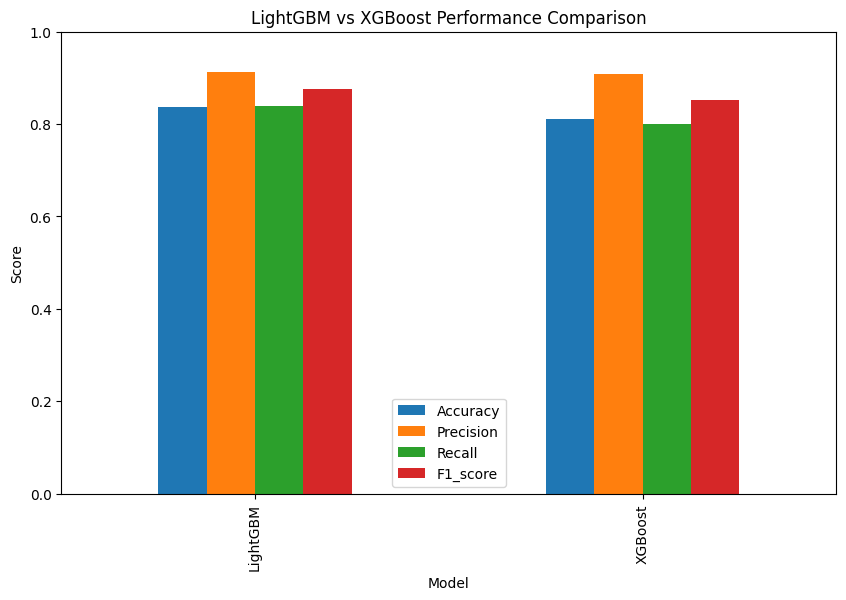

In [ ]:
# Plot metrics
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1_score"]].plot(kind="bar", figsize=(10,6))
plt.title("LightGBM vs XGBoost Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

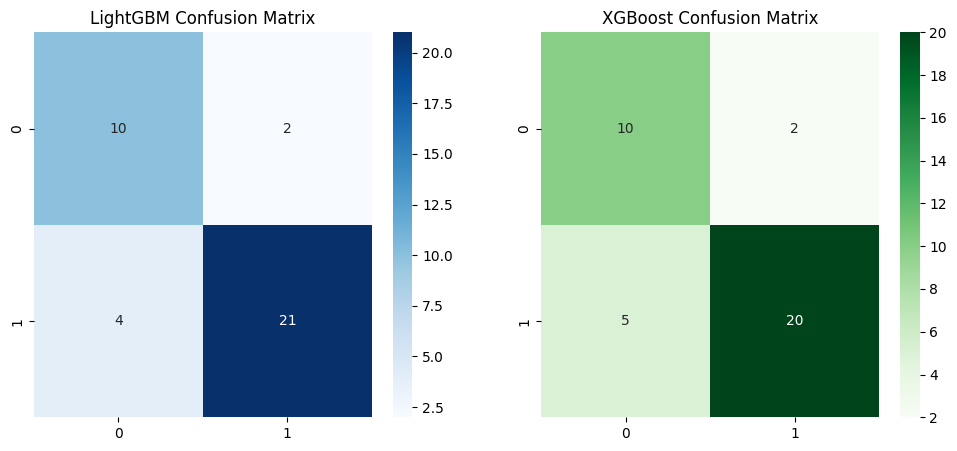

In [ ]:
# confusion Metrix
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, lgb_best.predict(x_test)), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("LightGBM Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, xgb_best.predict(x_test)), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")

plt.show()